<a href="https://colab.research.google.com/github/GODHYEONJU/MS-AI-School-/blob/main/5_10_ML_Keras_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [ ]:
# 훈련데이터와 테스트 데이터의 백터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
#라벨 데이터를 카테고리 데이터로 전환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# 신경망 모델을 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
#검증용
x_val = x_train[:1000]
#조각난 학습용
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 123ms/step - loss: 2.7265 - accuracy: 0.4811 - val_loss: 1.8682 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 2s 112ms/step - loss: 1.5448 - accuracy: 0.6864 - val_loss: 1.3819 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 2s 108ms/step - loss: 1.1675 - accuracy: 0.7504 - val_loss: 1.1997 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 2s 128ms/step - loss: 0.9560 - accuracy: 0.7954 - val_loss: 1.0848 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 2s 116ms/step - loss: 0.7982 - accuracy: 0.8281 - val_loss: 1.0230 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 2s 121ms/step - loss: 0.6741 - accuracy: 0.8520 - val_loss: 1.0298 - val_accuracy: 0.7650
Epoch 7/20
16/16 [==============================] - 3s 186ms/step - loss: 0.5669 - accuracy: 0.8789 - val_loss: 0.9553 - val_accuracy: 0.7920
Epoch 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_loss = history.history['val_accuracy']

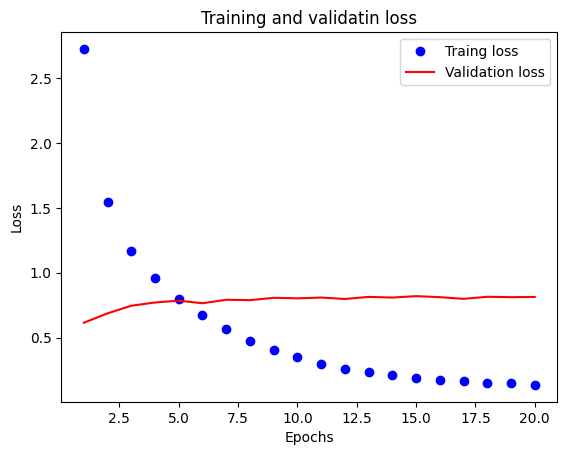

In [ ]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Traing loss')
plt.plot(epochs, val_loss, 'r-', label="Validation loss")
plt.title('Training and validatin loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

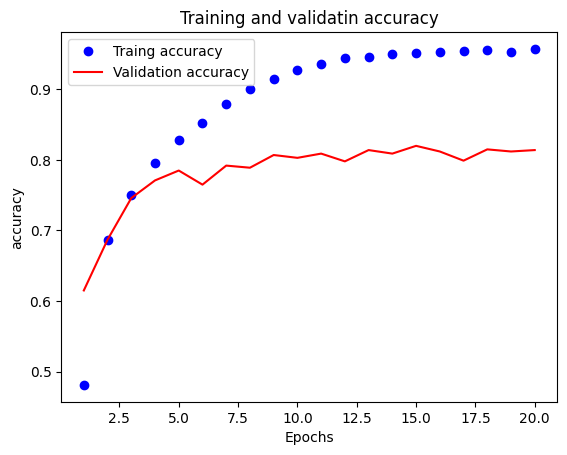

In [ ]:
plt.plot(epochs, acc, 'bo', label='Traing accuracy')
plt.plot(epochs, val_loss, 'r-', label="Validation accuracy")
plt.title('Training and validatin accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

val_acc, val_loss 가장 최적합되는 포인트를 찾아야함. 몇번째 반복에서 젤 잘 되는지..

In [ ]:
#검증된 결과로 다시 학습

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/10
16/16 [==============================] - 2s 80ms/step - loss: 2.5873 - accuracy: 0.4905 - val_loss: 1.7696 - val_accuracy: 0.6000
Epoch 2/10
16/16 [==============================] - 1s 85ms/step - loss: 1.4878 - accuracy: 0.6780 - val_loss: 1.3476 - val_accuracy: 0.6870
Epoch 3/10
16/16 [==============================] - 2s 106ms/step - loss: 1.1440 - accuracy: 0.7492 - val_loss: 1.1662 - val_accuracy: 0.7350
Epoch 4/10
16/16 [==============================] - 2s 100ms/step - loss: 0.9341 - accuracy: 0.7972 - val_loss: 1.0549 - val_accuracy: 0.7800
Epoch 5/10
16/16 [==============================] - 1s 71ms/step - loss: 0.7734 - accuracy: 0.8330 - val_loss: 0.9940 - val_accuracy: 0.7920
Epoch 6/10
16/16 [==============================] - 1s 59ms/step - loss: 0.6473 - accuracy: 0.8618 - val_loss: 0.9561 - val_accuracy: 0.7980
Epoch 7/10
16/16 [==============================] - 1s 64ms/step - loss: 0.5428 - accuracy: 0.8856 - val_loss: 0.9346 - val_accuracy: 0.7970
Epoch 8/10


eval_result 정확도는 78%

> 들여쓴 블록


모델의 loss는 0.97